In [3]:
pip install opencv-python numpy matplotlib

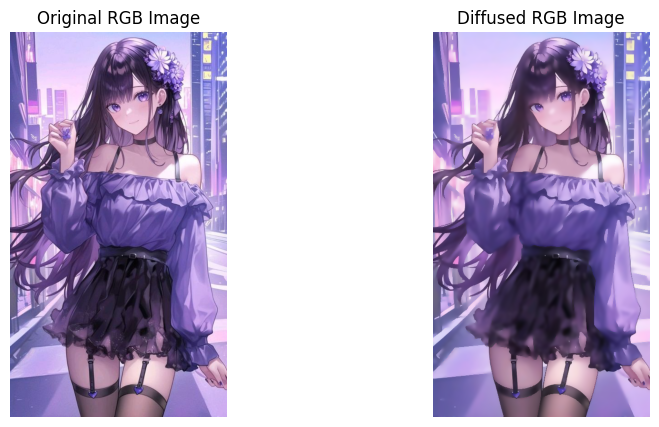

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def perona_malik_diffusion(image, iterations=20, K=20, lambda_=0.25, option=1):
    """
    Implements Perona-Malik anisotropic diffusion on gray or RGB image.
    Equation:
        ∂u/∂t = div(g(|∇u|)∇u)
    where g(|∇u|) is the edge stopping function.

    Parameters:
    - image: Input grayscale image
    - iterations: Number of iterations
    - K: Contrast parameter
    - lambda_: Time step (controls the diffusion rate)
    - option: Choice of edge-stopping function
        1: g(s) = exp(-(s/K)^2)  (Perona-Malik function 1)
        2: g(s) = 1 / (1 + (s/K)^2)  (Perona-Malik function 2)
    """
    if len(image.shape) == 3:
        diffused = np.zeros_like(image, dtype=np.uint8)
        for i in range(3):
            diffused[:, :, i] = perona_malik_diffusion(image[:, :, i], iterations, K, lambda_, option)
        return diffused
    else:
        image = image.astype(np.float32)
        rows, cols = image.shape
        diffused = image.copy()

        for _ in range(iterations):
            north = np.roll(diffused, -1, axis=0) - diffused
            south = np.roll(diffused, 1, axis=0) - diffused
            east = np.roll(diffused, -1, axis=1) - diffused
            west = np.roll(diffused, 1, axis=1) - diffused

            if option == 1:
                c_n = np.exp(-(north/K)**2)
                c_s = np.exp(-(south/K)**2)
                c_e = np.exp(-(east/K)**2)
                c_w = np.exp(-(west/K)**2)
            else:
                c_n = 1 / (1 + (north/K)**2)
                c_s = 1 / (1 + (south/K)**2)
                c_e = 1 / (1 + (east/K)**2)
                c_w = 1 / (1 + (west/K)**2)

            diffused += lambda_ * (c_n * north + c_s * south + c_e * east + c_w * west)

        return np.clip(diffused, 0, 255).astype(np.uint8)

# Load an RGB image
image_path = "/content/_.jpeg"
rgb_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

diffused_rgb_image = perona_malik_diffusion(rgb_image, iterations=20, K=20, lambda_=0.25, option=1)

os.makedirs("results", exist_ok=True)
cv2.imwrite("results/diffused_rgb_image.jpg", cv2.cvtColor(diffused_rgb_image, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original RGB Image")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Diffused RGB Image")
plt.imshow(diffused_rgb_image)
plt.axis('off')

plt.show()
